# Calculate tanimoto scores

In [5]:
import pickle
import os
import pandas as pd
import numpy as np

path_data = "C:\\HSD\\OneDrive - Hochschule Düsseldorf\\Data\\ms2query"
outfile = os.path.join(path_data, "ALL_GNPS_15_12_2021_positive_annotated.pickle")
with open(outfile, 'rb') as file:
    positive_fully_annotated = pickle.load(file)

### Use most frequent InChI for every unique inchikey

In [10]:
positive_fully_annotated[0].metadata

{'pepmass': (981.54, None),
 'charge': 1,
 'mslevel': '2',
 'source_instrument': 'LC-ESI-qTof',
 'filename': '130618_Ger_Jenia_WT-3-Des-MCLR_MH981.4-qb.1.1..mgf',
 'seq': '*..*',
 'ionmode': 'positive',
 'organism': 'GNPS-LIBRARY',
 'name': '3-Des-Microcystein_LR M+H',
 'pi': 'Gerwick',
 'datacollector': 'Jenia',
 'smiles': 'CC(C)CC1NC(=O)C(C)NC(=O)C(=C)N(C)C(=O)CCC(NC(=O)C(C)C(NC(=O)C(CCCNC(N)=N)NC(=O)C(C)C(NC1=O)C(O)=O)\\C=C\\C(\\C)=C\\C(C)C(O)Cc1ccccc1)C(O)=O',
 'inchi': 'InChI=1S/C48H72N10O12/c1-25(2)22-36-45(66)57-39(47(69)70)29(6)41(62)54-34(16-13-21-51-48(49)50)44(65)53-33(18-17-26(3)23-27(4)37(59)24-32-14-11-10-12-15-32)28(5)40(61)55-35(46(67)68)19-20-38(60)58(9)31(8)43(64)52-30(7)42(63)56-36/h10-12,14-15,17-18,23,25,27-30,33-37,39,59H,8,13,16,19-22,24H2,1-7,9H3,(H,52,64)(H,53,65)(H,54,62)(H,55,61)(H,56,63)(H,57,66)(H,67,68)(H,69,70)(H4,49,50,51)/b18-17+,26-23+',
 'inchiaux': 'N/A',
 'pubmed': 'N/A',
 'submituser': 'mwang87',
 'libraryquality': '1',
 'spectrumid': 'CCMSLIB00000

In [11]:
inchikeys_list = []
inchi_list = []
spectrum_ids = []

for s in positive_fully_annotated:
    inchikeys_list.append(s.get("inchikey")[:14])
    inchi_list.append(s.get("inchi"))
    spectrum_ids.append(s.get("spectrumid"))
    
metadata = pd.DataFrame({"inchikey14": inchikeys_list,
                        "inchi": inchi_list,
                        "spectrumid": spectrum_ids})
metadata.head()

,inchikey14,inchi,spectrumid
0,IYDKWWDUBYWQGF,InChI=1S/C48H72N10O12/c1-25(2)22-36-45(66)57-3...,CCMSLIB00000001547
1,KNGPFNUOXXLKCN,InChI=1S/C45H73N5O10S3/c1-14-17-24(6)34(52)26(...,CCMSLIB00000001548
2,WXDBUBIFYCCNLE,InChI=1S/C24H38ClNO5/c1-3-4-5-6-8-11-19(30-2)1...,CCMSLIB00000001549
3,CGZKSPLDUIRCIO,InChI=1S/C36H20N2O4/c39-21-13-9-19(10-14-21)17...,CCMSLIB00000001550
4,USXIYWCPCGVOKF,"InChI=1S/C27H34Cl2N2O9S2/c1-13-17(9-8-10-27(7,...",CCMSLIB00000001552


Text(0.5, 0, 'number of spectra with this inchikey')

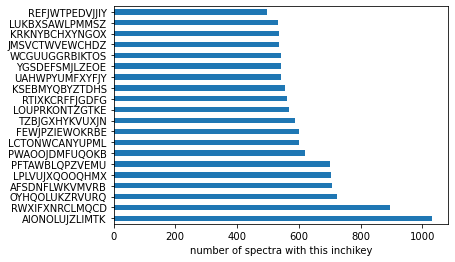

In [18]:
from matplotlib import pyplot as plt

metadata["inchikey14"].value_counts()[:20].plot(kind="barh")
plt.xlabel("number of spectra with this inchikey")

In [20]:
most_common_inchi = metadata.groupby('inchikey14')['inchi'].agg(lambda x: x.value_counts().index[0])
most_common_inchi

inchikey14
AAABMNXUOFPYQK    InChI=1S/C25H43NO10/c1-13-10-25(32-8,36-15(3)1...
AABILZKQMVKFHP    InChI=1S/C21H33NO8/c1-7-13(2)18(23)30-16-9-11-...
AABUHSBGEIUSRJ    InChI=1S/C17H16N2O2/c1-13(20)18-15-8-10-16(11-...
AABUKWVVUWBZCS    InChI=1S/C21H14O3/c22-16-11-12-17-18(13-16)24-...
AABZZWPMCAZHFC    InChI=1S/C59H52N14O12S5/c1-25-16-43(76)73-46(2...
                                        ...                        
ZZWJAVCRIXZEQH    InChI=1S/C25H26N2O4/c1-3-8-23(28)27(18-22-11-7...
ZZWPMFROUHHAKY    InChI=1S/C22H22O11/c1-30-15-4-9(2-3-12(15)25)2...
ZZYHCCDMBJTROG    InChI=1S/C17H21NO.C6H8O7/c1-18(2)12-13-19-17-1...
ZZYSLNWGKKDOML    InChI=1S/C18H24ClN3O/c1-6-14-15(19)16(22(5)21-...
ZZZYHIMVKOHVIH    InChI=1S/C26H32O11/c1-10(2)6-15(28)37-18-20-25...
Name: inchi, Length: 20889, dtype: object

In [2]:
from collections import Counter 
  
def most_frequent(List): 
    occurence_count = Counter(List) 
    return occurence_count.most_common(1)[0][0] 

In [24]:
inchikeys_list = []
inchi_list = []
spectrum_ids = []

for s in positive_fully_annotated:
    inchikeys_list.append(s.get("inchikey"))
    inchi_list.append(s.get("inchi"))
    spectrum_ids.append(s.get("spectrumid"))

inchi_array = np.array(inchi_list)    
inchikeys14_array = np.array([x[:14] for x in inchikeys_list])
inchikeys14_unique = list({x[:14] for x in inchikeys_list})
len(inchikeys14_unique)

20889

In [26]:
inchi_mapping = []
ID_mapping = []
spectrum_ID_mapping = []

for inchikey14 in inchikeys14_unique:
    idx = np.where(inchikeys14_array == inchikey14)[0]
    
    inchi = most_frequent([positive_fully_annotated[i].get("inchi") for i in idx])
    inchi_mapping.append(inchi)
    ID = idx[np.where(inchi_array[idx] == inchi)[0][0]]
    ID_mapping.append(ID)
    spectrum_ID_mapping.append(positive_fully_annotated[ID].get("spectrumid"))

In [29]:
metadata = pd.DataFrame(list(zip(inchikeys14_unique,
                                 inchi_mapping,
                                 ID_mapping,
                                 spectrum_ID_mapping)),
                        columns=["inchikey14", "inchi", "ID", "spectrumid"])
metadata.head()

,inchikey14,inchi,ID,spectrumid
0,LFTLOKWAGJYHHR,"InChI=1S/C5H11NO2/c1-6(7)2-4-8-5-3-6/h2-5H2,1H3",269780,CCMSLIB00005772787
1,BQDXDGDOYPUUOD,"InChI=1S/C15H22O4/c1-8-9-6-11-10(4-5-14(11,2)1...",15415,CCMSLIB00000849571
2,VEPUCZUJLKAVNM,InChI=1S/C20H32O3/c1-2-3-4-5-6-7-8-9-10-11-12-...,138492,CCMSLIB00006438578
3,PXPSEALQIQRPQY,"InChI=1S/C22H24NO4/c1-23(2,3)8-7-13-9-17(24-4)...",4656,CCMSLIB00005724870
4,HDZVRBPBPCZCJG,"""InChI=1S/C43H76NO8P/c1-3-5-7-9-11-13-15-17-19...",33995,CCMSLIB00003090566


In [30]:
metadata_file = os.path.join(path_data, "metadata_positive_inchikey_inchi_mapping.csv")
metadata.to_csv(metadata_file)

In [31]:
import numpy as np
from matchms import calculate_scores
from matchms import Spectrum
from matchms.filtering import add_fingerprint
from matchms.similarity import FingerprintSimilarity
from tqdm.notebook import tqdm

# Add fingerprints
fingerprint_spectra = []
for i in tqdm(metadata.ID.values):
    fingerprint_spectra.append(add_fingerprint(positive_fully_annotated[i],
                                               fingerprint_type="daylight",
                                               nbits=2048))

# Specify type and calculate similarities
similarity_measure = FingerprintSimilarity("jaccard")
scores = calculate_scores(fingerprint_spectra, fingerprint_spectra,
                          similarity_measure, is_symmetric=True)


  0%|          | 0/20889 [00:00<?, ?it/s]

In [33]:
results = pd.DataFrame(scores.scores,
                       index = metadata.inchikey14,
                       columns = metadata.inchikey14)
results.head()

inchikey14,LFTLOKWAGJYHHR,BQDXDGDOYPUUOD,VEPUCZUJLKAVNM,PXPSEALQIQRPQY,HDZVRBPBPCZCJG,SXJIZQPZESTWLD,JDOFZOKGCYYUER,WGTCMJBJRPKENJ,FCCDDURTIIUXBY,FDLLEBFMOIHMNM,...,RJAHLSXSRQXGGI,VKJTXCWIQDBMLE,NFIHKFSODJJLGC,NHLBOKNHQIEJIH,QABASLXUKXNHMC,XGVJWXAYKUHDOO,MNKNQKOOKLVXDB,CQKNELOTFUSOTP,MHCYVCDXRQGUFW,NMCMVEXMLSARCJ
inchikey14,,,,,,,,,,,,,,,,,,,,,
LFTLOKWAGJYHHR,1.000000,0.057353,0.042969,0.053269,0.069264,0.055453,0.048193,0.053296,0.052863,0.056204,...,0.049612,0.054762,0.053929,0.060065,0.049683,0.052980,0.049046,0.095833,0.050964,0.050159
BQDXDGDOYPUUOD,0.057353,1.000000,0.162866,0.215026,0.242169,0.176221,0.296270,0.195915,0.089888,0.460000,...,0.185547,0.430151,0.180851,0.218014,0.321244,0.297297,0.272672,0.147776,0.317369,0.253207
VEPUCZUJLKAVNM,0.042969,0.162866,1.000000,0.286316,0.113158,0.152310,0.208607,0.264908,0.082418,0.186620,...,0.157480,0.167925,0.233333,0.152523,0.228311,0.251228,0.226978,0.080844,0.289835,0.231393
PXPSEALQIQRPQY,0.053269,0.215026,0.286316,1.000000,0.134357,0.185499,0.342992,0.344860,0.081680,0.257655,...,0.243169,0.248216,0.351724,0.207021,0.299073,0.376868,0.351122,0.073363,0.362462,0.374658
HDZVRBPBPCZCJG,0.069264,0.242169,0.113158,0.134357,1.000000,0.145266,0.205817,0.136898,0.102000,0.240987,...,0.139401,0.275825,0.136986,0.157074,0.223055,0.192202,0.190231,0.166329,0.196615,0.175919


In [34]:
pickle.dump(results,
           open(os.path.join(path_data, "GNPS_15_12_2021_pos_tanimoto_scores.pickle"), "wb"))